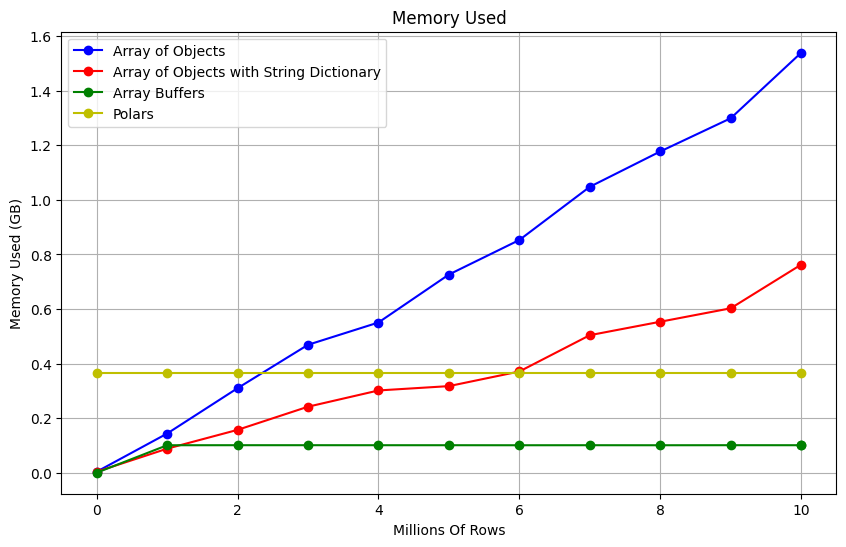

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
array_of_objects_df = pd.read_csv("/home/jack/code/df.ts/stats/arrayOfObjects_10000000.csv")
array_of_objects_string_dict_df = pd.read_csv("/home/jack/code/df.ts/stats/arrayOfObjectsStringDictionary_10000000.csv")
array_buffer_df = pd.read_csv("/home/jack/code/df.ts/stats/arrayBuffer_10000000.csv")
polars_df = pd.read_csv("/home/jack/code/df.ts/stats/polars_10000000.csv")

# Convert 'heapUsed' from bytes to gigabytes
array_of_objects_df['heapUsed_GB'] = array_of_objects_df['heapUsed'] / (1024 ** 3)
array_of_objects_string_dict_df['heapUsed_GB'] = array_of_objects_string_dict_df['heapUsed'] / (1024 ** 3)

# Convert 'rows' to millions of rows
array_of_objects_df['rows_millions'] = array_of_objects_df['rows'] / 1_000_000
array_of_objects_string_dict_df['rows_millions'] = array_of_objects_string_dict_df['rows'] / 1_000_000

array_buffer_df['arrayBuffers_GB'] = array_buffer_df['arrayBuffers'] / (1024 ** 3)
array_buffer_df['rows_millions'] = array_buffer_df['rows'] / 1_000_000

# Polars: Create stub rows from 0 to 10 million and set the same value for each row
rows = range(0, 11_000_000, 1_000_000)

# Create a DataFrame with the range of rows and fill the values with the data from the 10 million row
last_row = polars_df.iloc[-1]  # Select the last row (10 million rows data)

polars_filled_df = pd.DataFrame({
    'rows': rows,
    'rss': [last_row['rss']] * len(rows),
    'heapTotal': [last_row['heapTotal']] * len(rows),
    'heapUsed': [last_row['heapUsed']] * len(rows),
    'external': [last_row['external']] * len(rows),
    'arrayBuffers': [last_row['arrayBuffers']] * len(rows),
    'timestamp': [last_row['timestamp']] * len(rows),
})

# Convert 'rss' to GB
polars_filled_df['rss_GB'] = polars_filled_df['rss'] / (1024 ** 3)

# Convert 'rows' to millions of rows
polars_filled_df['rows_millions'] = polars_filled_df['rows'] / 1_000_000

# Create a plot of heapUsed (in GB) against rows (in millions)
plt.figure(figsize=(10, 6))
plt.plot(array_of_objects_df['rows_millions'], array_of_objects_df['heapUsed_GB'], marker='o', linestyle='-', color='b', label='Array of Objects')
plt.plot(array_of_objects_string_dict_df['rows_millions'], array_of_objects_string_dict_df['heapUsed_GB'], marker='o', linestyle='-', color='r', label='Array of Objects with String Dictionary')
plt.plot(array_buffer_df['rows_millions'], array_buffer_df['arrayBuffers_GB'], marker='o', linestyle='-', color='g', label='Array Buffers')
plt.plot(polars_filled_df['rows_millions'], polars_filled_df['rss_GB'], marker='o', linestyle='-', color='y', label='Polars')

# Add labels and title
plt.xlabel('Millions Of Rows')
plt.ylabel('Memory Used (GB)')
plt.title('Memory Used')

# Add legend
plt.legend()

# Display the plot with grid
plt.grid(True)
plt.show()
